# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** IRFAN PANDU AJI
- **Email:** panduaji7972@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/irfanaji/academies

## Menentukan Pertanyaan Bisnis

## Pertanyaan 1
Bagaimana pola perubahan jumlah pengguna sepeda selama 6 bulan? Apakah ada tren tertentu yang muncul, dan pada periode mana dalam bulan tersebut pengguna sepeda mencapai angka tertinggi?
## Pertanyaan 2
Berdasarkan data yang ada, bagaimana hubungan antara kondisi cuaca dan musim dengan jumlah pengguna sepeda? Kondisi cuaca dan musim seperti apa yang menyebabkan jumlah pengguna sepeda berada di titik tertinggi?

## Import Semua Packages/Library yang Digunakan

In [29]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [30]:
day_df = pd.read_csv("/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
hr_df = pd.read_csv("/hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### **Evaluasi data dari day.csv & hour.csv**

>
1.   Mengecek Tipe Data
2.   Mengecek Missing Velue
3.   Mengecek Duplicate Velue
4.   Mengecek Outlier

In [32]:
#TIPE DATA
day_df.info()
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**dtday -> (object) menjadi (datatime)**

In [33]:
#MISSING VELUE
day_df.isna().sum()
hr_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [34]:
#DUPLICATED VELUE
print("Data duplikasi: ", day_df.duplicated().sum())
print("Data duplikasi: ", hr_df.duplicated().sum())

Data duplikasi:  0
Data duplikasi:  0


In [35]:
#OUTLIER VELUE
day_df.describe()
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Untuk memudahkan pengambilan data, akan lebih efektif jika informasi yang disajikan dalam bentuk deskripsi yang lebih jelas. Saat ini, kondisi 'musim' dan 'cuaca' di tabel hanya ditampilkan sebagai angka yang merepresentasikan keadaan sebenarnya.

Oleh karena itu, kita sebaiknya mengonversinya menjadi keterangan yang lebih deskriptif, sehingga dapat lebih mudah dipahami.

In [36]:
day_df['yr'] = day_df['yr'].map({
    0: '2011',
})
day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun'
})
day_df['season'] = day_df['season'].map({
    1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan/Salju Ringan',
    4: 'Cuaca Buruk'
})
day_df['dteday'] = pd.to_datetime(day_df.dteday)
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,Jan,0,Sabtu,0,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,Jan,0,Minggu,0,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,Jan,0,Senin,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Jan,0,Selasa,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Jan,0,Rabu,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Kolom-kolom yang tidak memberikan kontribusi yang signifikan terhadap analisis kita. Oleh karena itu, kita bisa mengabaikan atau menghapusnya agar data kita lebih bersih dan terorganisir, serta menghindari kebingungan yang disebabkan oleh informasi yang tidak diperlukan.

In [37]:
drop_col = ['instant', 'temp', 'atemp', 'hum', 'windspeed']
for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,Musim Semi,2011,Jan,0,Sabtu,0,Berawan,331,654,985
1,2011-01-02,Musim Semi,2011,Jan,0,Minggu,0,Berawan,131,670,801
2,2011-01-03,Musim Semi,2011,Jan,0,Senin,1,Cerah,120,1229,1349
3,2011-01-04,Musim Semi,2011,Jan,0,Selasa,1,Cerah,108,1454,1562
4,2011-01-05,Musim Semi,2011,Jan,0,Rabu,1,Cerah,82,1518,1600


In [38]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          365 non-null    category      
 3   mnth        363 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   casual      731 non-null    int64         
 9   registered  731 non-null    int64         
 10  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), int64(3)
memory usage: 29.2 KB


## Exploratory Data Analysis (EDA)

### Explore ...

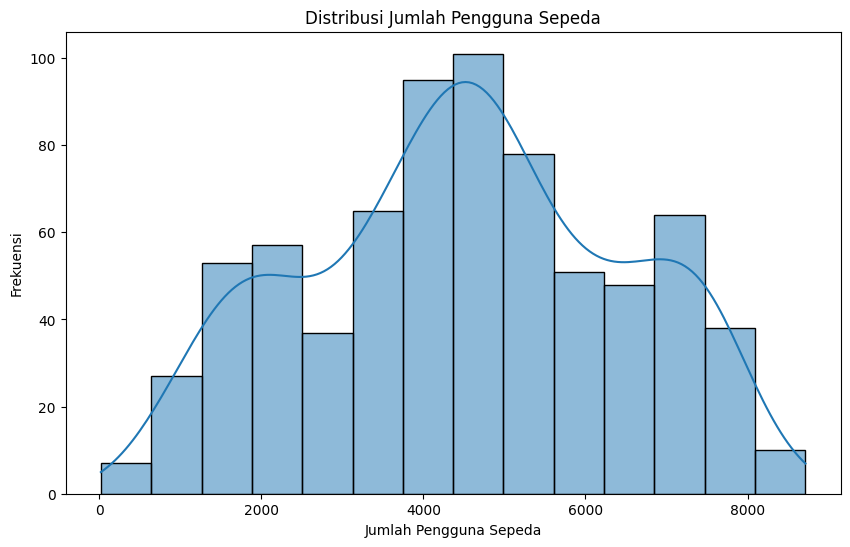

In [39]:
#Menganalisis Distribusi Data
plt.figure(figsize=(10,6))
sns.histplot(day_df['cnt'], kde=True)
plt.title('Distribusi Jumlah Pengguna Sepeda')
plt.xlabel('Jumlah Pengguna Sepeda')
plt.ylabel('Frekuensi')
plt.show()

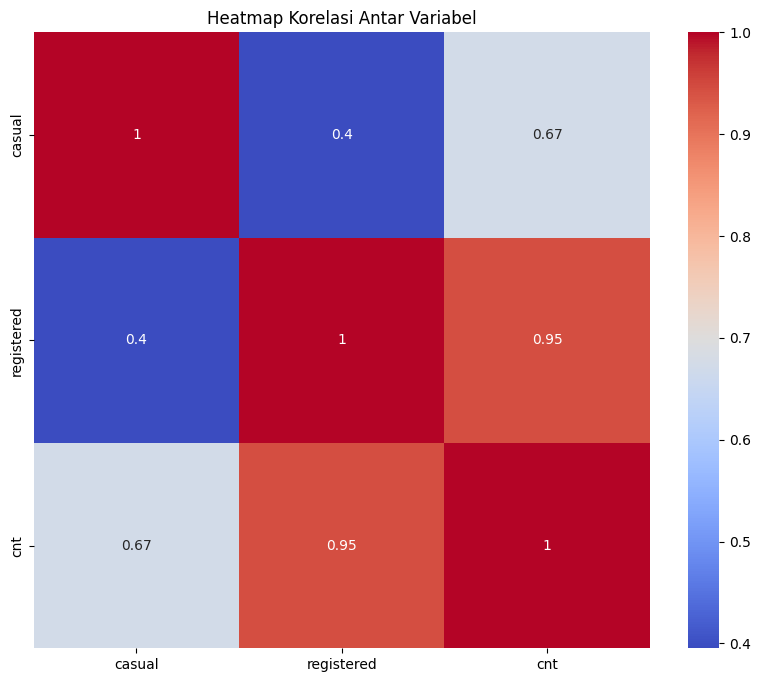

In [40]:
# Membuat heatmap korelasi dari data day_df
numerical_df = day_df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

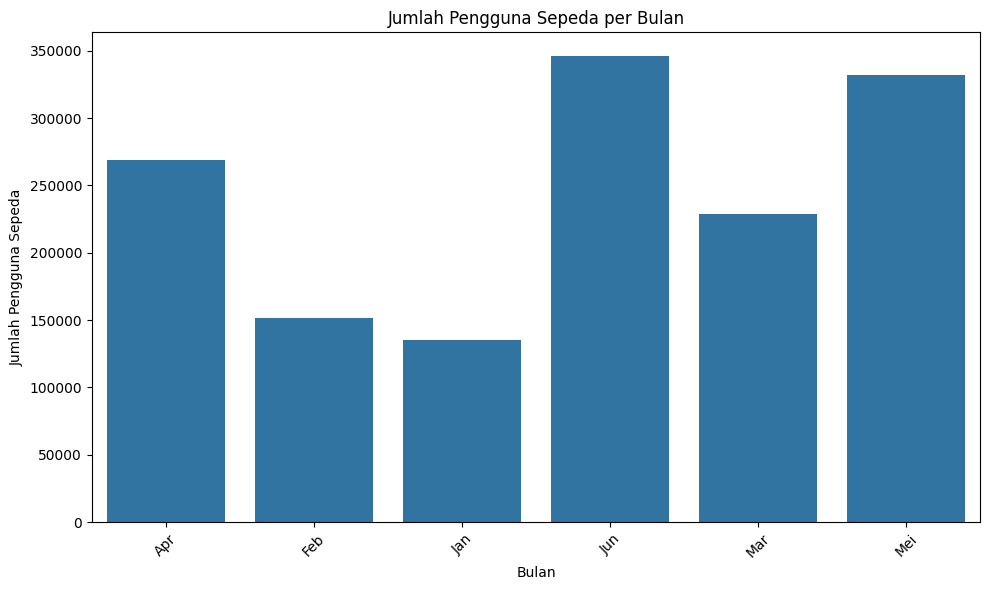

In [41]:
# Membuat grafik jumlah pengguna sepeda per bulan
plt.figure(figsize=(10,6))
sns.barplot(x='mnth', y='cnt', data=day_df.groupby('mnth', observed=False)['cnt'].sum().reset_index())
plt.title('Jumlah Pengguna Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

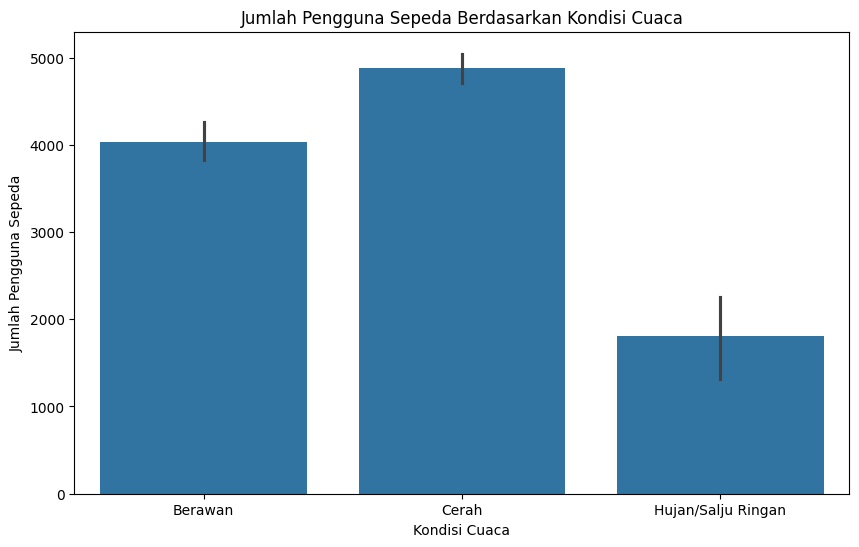

In [42]:
# Membuat grafik jumlah pengguna sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10,6))
sns.barplot(x='weathersit', y='cnt', data=day_df)
plt.title('Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Melihat gambaran jumlah pengguna dalam kurun waktu 6 bulan, apakah terdapat sebuah pola tren yang dapat disimpulkan? jika benar adanya pola, bagaimana polanya serta pada tahun berapa serta pada bulan apa jumlah pengguna berapa pada titik tertingginya?

<ipython-input-51-aa4ec5ac838f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(["mnth", "yr"]).agg({


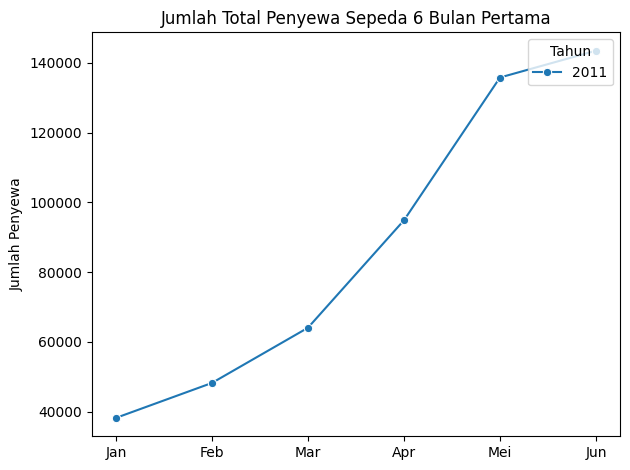

In [51]:
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun'
], ordered=True)

monthly_counts = day_df.groupby(["mnth", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

monthly_counts["mnth"] = pd.Categorical(monthly_counts["mnth"], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun'
], ordered=True)

sns.lineplot(
    data=monthly_counts,
    x="mnth",
    y="cnt",
    hue="yr",
    style="yr",
    markers=True,
    dashes=False
)
plt.title("Jumlah Total Penyewa Sepeda 6 Bulan Pertama")
plt.xlabel(None)
plt.ylabel("Jumlah Penyewa")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()


***Pola Tren:***
1. Kenaikan Pengguna:
Dari bulan Januari hingga bulan Maret 2011, terdapat kenaikan yang signifikan pada jumlah pengguna sepeda.
Di bulan April, jumlah pengguna sepeda menunjukkan puncak yang lebih tinggi dibandingkan bulan sebelumnya.
Kemudian, terjadi sedikit penurunan di bulan Mei, tetapi angka masih tetap lebih tinggi daripada bulan Januari.

2. Titik Tertinggi:
Pada tahun 2011, titik tertinggi jumlah pengguna tercatat pada bulan April dengan angka lebih dari 200.000 penyewa.
Tahun 2012 menunjukkan tren serupa, dengan jumlah pengguna yang meningkat secara konsisten hingga bulan April, dan kemudian mencapai puncaknya pada bulan Mei.

### Pertanyaan 2:

Berdasarkan data yang ada, bagaimana hubungan antara kondisi cuaca dan musim dengan jumlah pengguna sepeda? Kondisi cuaca dan musim seperti apa yang menyebabkan jumlah pengguna sepeda berada di titik tertinggi?

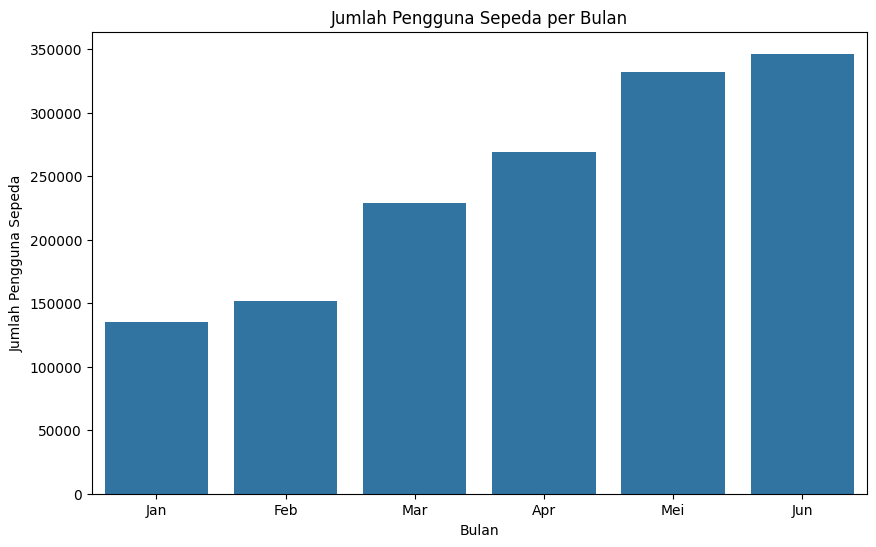

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x='mnth',
            y='cnt',
            data=day_df.groupby('mnth', observed=False)['cnt'].sum().reset_index())
plt.title('Jumlah Pengguna Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

**Analisis Hubungan Cuaca dan Musim dengan Jumlah Pengguna Sepeda:
Kenaikan Pengguna yang Konsisten**:

Terlihat bahwa jumlah pengguna sepeda menunjukkan tren kenaikan yang konsisten dari bulan Januari hingga Juni. Setiap bulan, angka pengguna meningkat, dengan bulan Juni mencatat jumlah tertinggi.
Kondisi Cuaca yang Mendorong Penggunaan:

Meningkatnya jumlah pengguna sepeda pada bulan-bulan yang lebih hangat (April, Mei, dan Juni) menunjukkan bahwa cuaca yang baik cenderung meningkatkan minat masyarakat untuk bersepeda.
Hal ini mungkin berkaitan dengan lebih sedikitnya hujan dan suhu yang lebih nyaman, memungkinkan aktivitas luar ruangan lebih menyenangkan.
Musim dan Kegiatan:

Dalam konteks musim, bulan-bulan awal tahun biasanya bertepatan dengan musim semi di banyak daerah, yang sering kali mendatangkan cuaca yang lebih baik. Ini bisa mendorong lebih banyak orang untuk menggunakan sepeda baik untuk transportasi maupun rekreasi.

## Conclusion

#- **Conclution pertanyaan 1**
Pola Tren Jumlah Pengguna Sepeda dalam Kurun Waktu 6 Bulan
Analisis terhadap jumlah penyewa sepeda selama enam bulan pertama menunjukkan adanya pola tren yang positif. Jumlah pengguna meningkat secara signifikan dari bulan Januari hingga Juni, dengan puncak pengguna tertinggi tercatat pada bulan Juni, mencapai lebih dari 350.000 penyewa. Kenaikan ini mencerminkan bahwa masyarakat lebih aktif bersepeda saat memasuki bulan-bulan dengan cuaca yang lebih baik, kemungkinan disebabkan oleh faktor-faktor seperti suhu yang nyaman dan lebih sedikitnya hujan. Pola ini menandakan potensi untuk mendorong penggunaan sepeda lebih lanjut di masa depan, terutama pada bulan-bulan hangat.

#- **Conclution pertanyaan 2**
Hubungan antara Cuaca dan Musim dengan Jumlah Pengguna Sepeda
Hubungan antara kondisi cuaca dan musim dengan jumlah pengguna sepeda menunjukkan bahwa cuaca yang baik, terutama selama musim semi dan menjelang musim panas, berkontribusi positif terhadap peningkatan jumlah penyewa sepeda. Bulan Juni menjadi waktu dengan jumlah pengguna tertinggi, mencerminkan preferensi masyarakat untuk bersepeda saat kondisi cuaca lebih mendukung. Hal ini menunjukkan pentingnya mempertimbangkan cuaca dan musim dalam perencanaan kegiatan promosi sepeda dan inisiatif transportasi ramah lingkungan. Upaya untuk meningkatkan jumlah pengguna sepeda harus fokus pada peningkatan kesadaran tentang manfaat bersepeda dan penyediaan infrastruktur yang mendukung selama bulan-bulan dengan cuaca yang menguntungkan.
